In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')
df.head(5)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [3]:
df['COD_VERRACO'].value_counts().head()

1872    534
2094    446
1941    435
2095    433
2086    417
Name: COD_VERRACO, dtype: int64

2. Especialmente será interesante cómo se comportan los verracos que llevan regularmente un pinchazo de ENZAPROST 
o DINO (que son prostaglandinas que les estimulan puntualmente la libido pero puede que les baje la productividad 
inmediata o a corto plazo), así como el resto de medicaciones. Ten en cuenta que cuando un verraco recibe una 
medicación es porque está enfermo, así que lo normal será que su productividad esté disminuida. Supongo que será 
un reto encontrar relaciones sólidas entre tratamientos y calidad seminal o supervivencia del verraco en el centro.

**INTENTO GRAFICAR TODO PARA VER LA DISMINUCIÓN DE LA PRODUCTIVIDAD**

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_tratamientos = pd.read_excel('TRATAMIENTOS_VERRACOS.xlsx')
df_tratamientos.head(25)

,CODIGO,COD_VERRACO,FECHA,DURACION,COD_TRATAMIENTO,NOTAS,CENTRO
0,29344,2221.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
1,29345,2407.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
2,29346,2409.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
3,29347,2416.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
4,29348,2419.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
5,29349,2422.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
6,29350,2201.0,2019-05-27,2019-05-29,PARA,NaN,CAL
7,29351,2390.0,2019-05-27,2019-05-29,PARA,NaN,CAL
8,29352,2391.0,2019-05-27,2019-05-29,PARA,NaN,CAL
9,29353,2392.0,2019-05-27,2019-05-29,PARA,NaN,CAL


In [5]:
lista = df_tratamientos['COD_VERRACO'].value_counts()
lista.head(10)

1872.0    233
2422.0    195
1946.0    194
2229.0    190
2044.0    174
1832.0    163
1863.0    162
2374.0    158
2421.0    156
1932.0    155
Name: COD_VERRACO, dtype: int64

In [6]:
lista.index[0]
max_verracos = 5

In [12]:
def graficar_verracos_mas_inyectados(lista, max_verracos):
    
    
    fig, ax = plt.subplots(max_verracos, 1)
    
    for i in range(max_verracos):
        
        datos = df[df['COD_VERRACO'] == lista.index[i]]
        media = datos['DOSIS_REAL'].mean()

        tratamientos = df_tratamientos[df_tratamientos['COD_VERRACO'] == lista.index[i]]

        tratamiento_ENZAPROST =  tratamientos[tratamientos['COD_TRATAMIENTO'] == 'ENZAPROST']

        fechas_tratamientos = tratamiento_ENZAPROST['FECHA']
        fechas_tratamientos = pd.DataFrame(fechas_tratamientos)
        fechas_tratamientos = fechas_tratamientos.sort_values(by='FECHA')
        fechas_tratamientos = fechas_tratamientos.reset_index()
        fecha_inicial = fechas_tratamientos['FECHA'][0]
        fechas_tratamientos = fechas_tratamientos.sort_values(by='FECHA', ascending=False).reset_index()
        fecha_final = fechas_tratamientos['FECHA'][0]
        
        aux = datos[datos['FECHA_REC'] >= fecha_inicial]
        aux = aux.sort_values(by='FECHA_REC')
        
        tratamiento_ENZAPROST['POI'] = media
        
        
        x = tratamiento_ENZAPROST['FECHA']
        y = tratamiento_ENZAPROST['POI']

        x1 = aux['FECHA_REC']
        y1= aux['DOSIS_REAL']

        fig1 = plt.figure(1)
        ax[i].plot_date(x, y, '*', color='red');
        ax[i].plot(x1, y1, '-', linewidth=1)
        plt.title('Producción DOSIS_REAL verraco')
        fig1.set_size_inches(15, 25)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


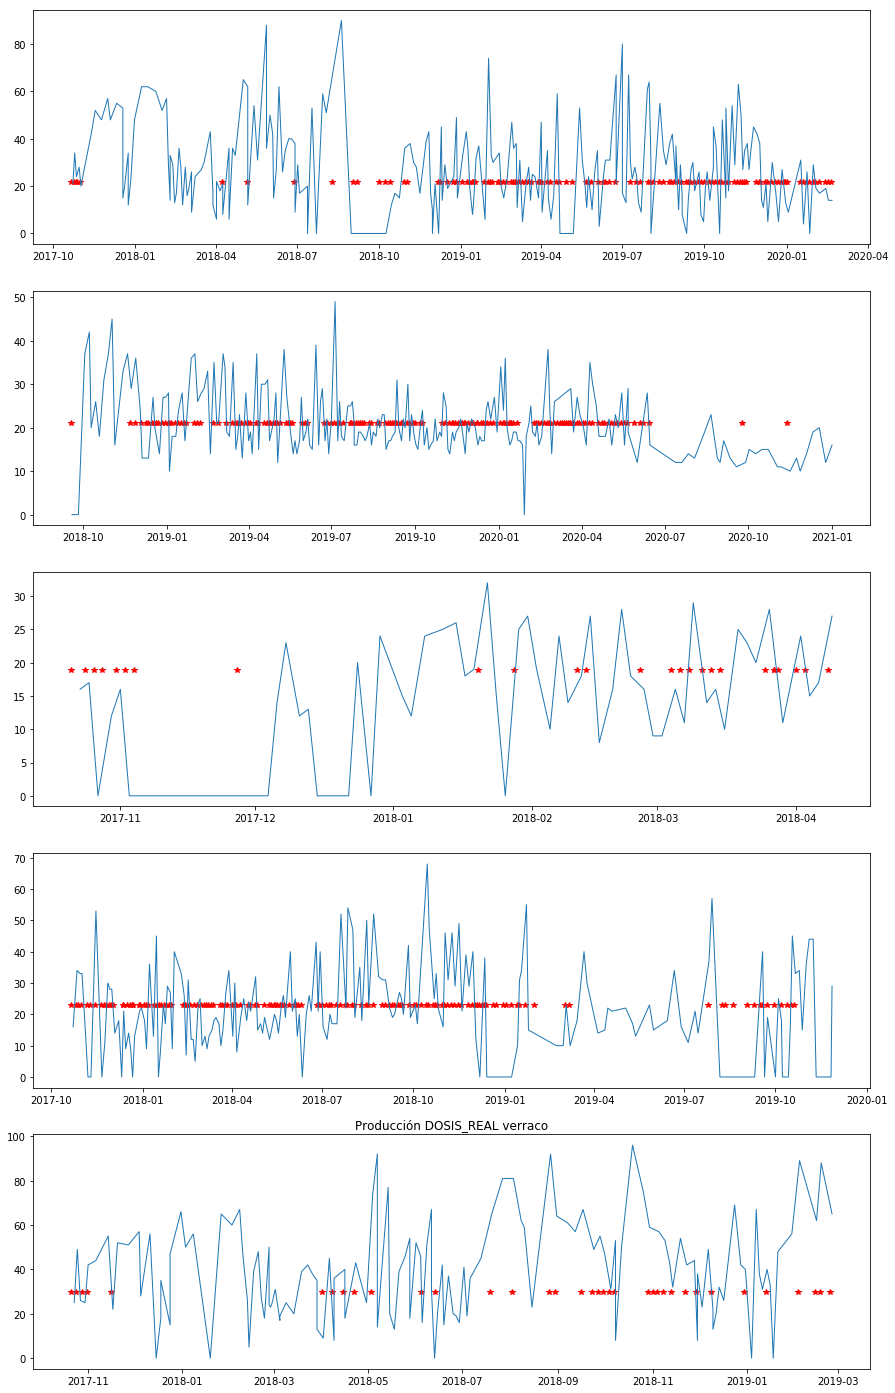

In [13]:
graficar_verracos_mas_inyectados(lista, max_verracos)